In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
#data imports 
data = pd.read_csv('abridged_counties.csv')
death_data = pd.read_csv('time_series_covid19_deaths_US.csv')
case_data = pd.read_csv('time_series_covid19_confirmed_US.csv')


In [5]:
data.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [4]:
# show number of counties per state
state_county_count= data.groupby('StateName').count()[['CountyName']]
state_county_count

,CountyName
StateName,
AK,32
AL,67
AR,75
AS,5
AZ,15
CA,58
CO,64
CT,8
DC,1


In [5]:
death_data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,1,1,1,1,1,1,1,1,2,3
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1,1,1,1,1,1,1,1,2,2
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,1,1,1,1,1,2,2,2,2,2
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,0,0,0,0,0,0,0,0,0,0
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,0,0,0,0,0,0,0,0,0,0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#join death and counties data
death_joined = data.join(death_data, lsuffix='StateName', rsuffix='Province_State')
death_joined

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,0,0,0,0,0,0,0,0,0,0
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,4,4,5,5,5,5,5,5,5,5
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,2,2,2,2,2,2,2,2,2,2
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,33,39,42,44,45,45,51,56,58,60
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,1,1,1,1,1,1,1,1,2,3
5,01011,1.0,11.0,Bullock,AL,Alabama,32.106336,-85.716804,32.116327,-85.701192,...,1,1,1,1,1,1,1,1,2,2
6,01013,1.0,13.0,Butler,AL,Alabama,31.757139,-86.684347,31.773539,-86.653550,...,1,1,1,1,1,2,2,2,2,2
7,01015,1.0,15.0,Calhoun,AL,Alabama,33.776245,-85.829561,33.725460,-85.819442,...,0,0,0,0,0,0,0,0,0,0
8,01017,1.0,17.0,Chambers,AL,Alabama,32.916331,-85.394853,32.860439,-85.266474,...,0,0,0,0,0,0,0,0,0,0
9,01019,1.0,19.0,Cherokee,AL,Alabama,34.191471,-85.604220,34.179333,-85.629194,...,0,0,0,0,0,0,0,0,0,0


In [394]:
death_plot = death_joined.set_index('StateName').groupby('StateName').sum().drop(['STATEFP',
 'COUNTYFP',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',
 'PopMale30-342010',
 'PopFmle30-342010',
 'PopMale35-442010',
 'PopFmle35-442010',
 'PopMale45-542010',
 'PopFmle45-542010',
 'PopMale55-592010',
 'PopFmle55-592010',
 'PopMale60-642010',
 'PopFmle60-642010',
 'PopMale65-742010',
 'PopFmle65-742010',
 'PopMale75-842010',
 'PopFmle75-842010',
 'PopMale>842010',
 'PopFmle>842010',
 '3-YrMortalityAge<1Year2015-17',
 '3-YrMortalityAge1-4Years2015-17',
 '3-YrMortalityAge5-14Years2015-17',
 '3-YrMortalityAge15-24Years2015-17',
 '3-YrMortalityAge25-34Years2015-17',
 '3-YrMortalityAge35-44Years2015-17',
 '3-YrMortalityAge45-54Years2015-17',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17',
 'mortality2015-17Estimated',
 'stay at home',
 '>50 gatherings',
 '>500 gatherings',
 'public schools',
 'restaurant dine-in',
 'entertainment/gym',
 'federal guidelines',
 'foreign travel ban',
 'SVIPercentile',
 'HPSAShortage',
 'HPSAServedPop',
 'HPSAUnderservedPop',
 'UID',
 'code3',
 'FIPS',
 'Lat',
 'Long_',
 'Population'], axis = 1)
death_plot = death_plot.T
#list(death_plot.columns)
death_plot = death_plot.iloc[50:]
death_plot = death_plot.set_index(pd.to_datetime(death_plot.index))

In [395]:

#gives states with most deaths per date 
list(death_plot.idxmax(axis=1))

# dates where NY had highest death_plot[death_plot['NY'] > 15000]
#leaders: AK, WA, NY overall for deaths 


['WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY']

Text(0, 0.5, 'Death Count')

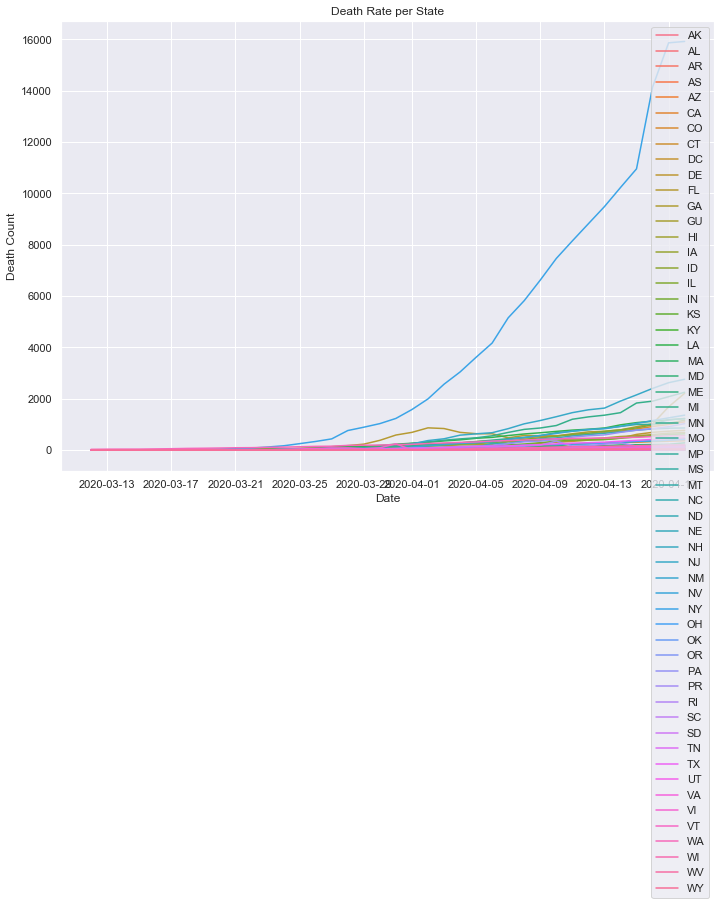

In [396]:
#line plot showing all states and they death rate over time 

sns.set(rc={'figure.figsize':(11.7, 8.27)})
plot1 = sns.lineplot(data = death_plot, dashes = False)
plot1.set_title('Death Rate per State')
plot1.set_xlabel('Date')
plot1.set_ylabel('Death Count')

In [10]:
case_data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,45,50,51,51,51,51,51,51,51,53
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15,17,19,19,19,23,24,26,26,25
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56,59,66,71,72,87,91,101,103,109
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,4,9,9,10,10,11,12,14,15,18
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,9,11,13,16,17,17,18,22,24,26
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,11,12,12,13,14,16,17,18,20,20


In [11]:
case_joined = data.join(case_data, lsuffix='StateName', rsuffix='Province_State')
case_joined
list(case_joined.columns)

['countyFIPS',
 'STATEFP',
 'COUNTYFP',
 'CountyName',
 'StateName',
 'State',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'CensusRegionName',
 'CensusDivisionName',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',


In [12]:
case_plot = case_joined.set_index('StateName').groupby('StateName').sum()
list(case_plot)

['STATEFP',
 'COUNTYFP',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',
 'PopMale30-342010',
 'PopFmle30-342010',
 'PopMale35-442010',
 'PopFmle35-442010',
 'PopMale45-54

In [382]:
case_plot = case_joined.set_index('StateName').groupby('StateName').sum().drop(['STATEFP',
 'COUNTYFP',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',
 'PopMale30-342010',
 'PopFmle30-342010',
 'PopMale35-442010',
 'PopFmle35-442010',
 'PopMale45-542010',
 'PopFmle45-542010',
 'PopMale55-592010',
 'PopFmle55-592010',
 'PopMale60-642010',
 'PopFmle60-642010',
 'PopMale65-742010',
 'PopFmle65-742010',
 'PopMale75-842010',
 'PopFmle75-842010',
 'PopMale>842010',
 'PopFmle>842010',
 '3-YrMortalityAge<1Year2015-17',
 '3-YrMortalityAge1-4Years2015-17',
 '3-YrMortalityAge5-14Years2015-17',
 '3-YrMortalityAge15-24Years2015-17',
 '3-YrMortalityAge25-34Years2015-17',
 '3-YrMortalityAge35-44Years2015-17',
 '3-YrMortalityAge45-54Years2015-17',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17',
 'mortality2015-17Estimated',
 'stay at home',
 '>50 gatherings',
 '>500 gatherings',
 'public schools',
 'restaurant dine-in',
 'entertainment/gym',
 'federal guidelines',
 'foreign travel ban',
 'SVIPercentile',
 'HPSAShortage',
 'HPSAServedPop',
 'HPSAUnderservedPop',
 'UID',
 'code3',
 'FIPS',
 'Lat',
 'Long_'], axis = 1)
case_plot = case_plot.T

case_plot


StateName,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/26/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/27/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/28/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/29/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/30/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/31/20,0,0,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [383]:
case_plot = case_plot.iloc[40:]
case_plot
case_plot = case_plot.set_index(pd.to_datetime(case_plot.index))

In [387]:
#gives states with most cases per date 
list(case_plot.idxmax(axis=1))

#leaders: WA, IL, CA, WA, NY


['CA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY']

Text(0, 0.5, 'Case Count')

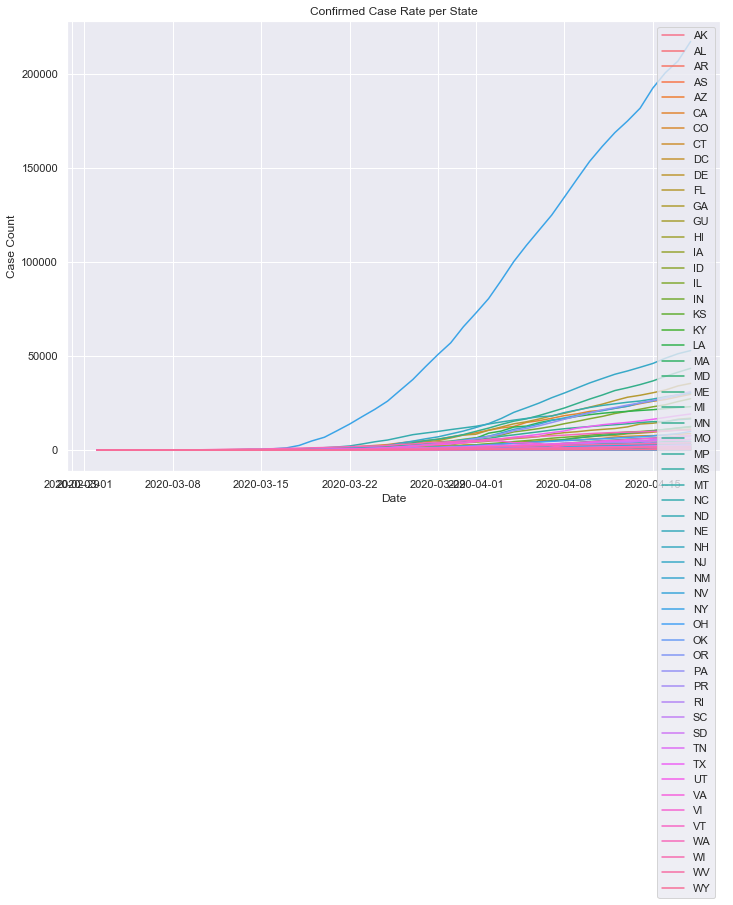

In [386]:
#line plot showing all states and they case rate over time 

plot2 = sns.lineplot(data = case_plot, dashes = False)
plot2.set_title('Confired Case Rate per State')
plot2.set_xlabel('Date')
plot2.set_ylabel('Case Count')


In [373]:
deaths_per_state = list(death_plot.sum(axis=0))
state_names_deaths  = []
death_count = 0

for i in range(len(death_plot.columns)): 
    for j in range(deaths_per_state[death_count]):
        state_names_deaths.append(death_plot.columns[i])
    death_count = death_count + 1 
state_names_deaths





['AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AL',
 'AL',
 'AL',

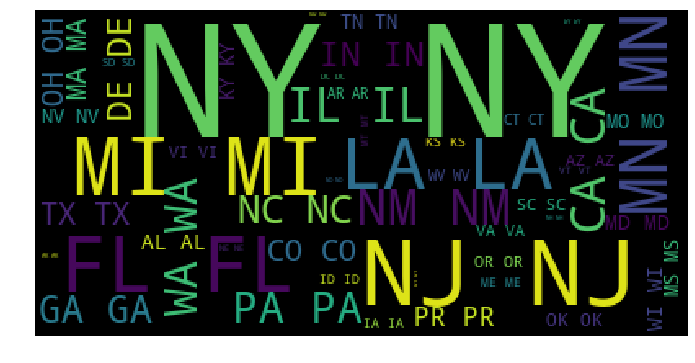

In [17]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
words = ' '.join(list(state_names_deaths))
wordcloud = WordCloud().generate(words)


plt.imshow(wordcloud)
plt.axis('off')


plt.show()

In [18]:
cases_per_state = list(case_plot.sum(axis=0))
state_names_cases  = []
cases_count = 0

for i in range(len(case_plot.columns)): 
    for j in range(cases_per_state[cases_count]):
        state_names_cases.append(case_plot.columns[i])
    cases_count = cases_count + 1 
state_names_cases

['AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',
 'AK',

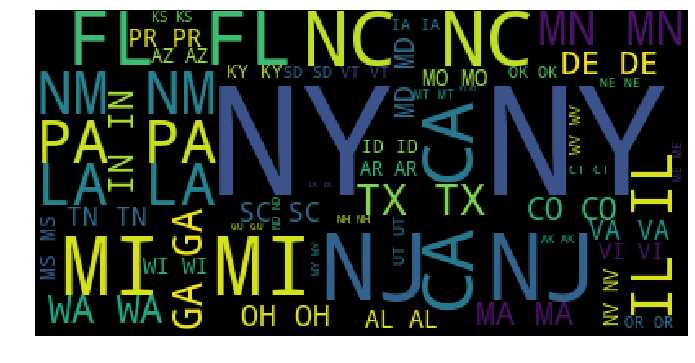

In [19]:
words = ' '.join(list(state_names_cases))
wordcloud = WordCloud().generate(words)


plt.imshow(wordcloud)
plt.axis('off')


plt.show()

In [20]:
#scatter death and gatherings 
death_per_state = pd.DataFrame(death_plot.sum(axis=0)).rename(columns={0:'Death_Count'})
death_per_state

,Death_Count
StateName,
AK,140
AL,2273
AR,782
AS,0
AZ,1059
CA,11124
CO,3926
CT,749
DC,277


In [23]:
socials_by_state = data.drop(['STATEFP', 'COUNTYFP', 'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE',
       'Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       "TotalM.D.'s,TotNon-FedandFed2017", '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'PopFmle20-242010', 'PopMale25-292010',
       'PopFmle25-292010', 'PopMale30-342010', 'PopFmle30-342010',
       'PopMale35-442010', 'PopFmle35-442010', 'PopMale45-542010',
       'PopFmle45-542010', 'PopMale55-592010', 'PopFmle55-592010',
       'PopMale60-642010', 'PopFmle60-642010', 'PopMale65-742010',
       'PopFmle65-742010', 'PopMale75-842010', 'PopFmle75-842010',
       'PopMale>842010', 'PopFmle>842010', '3-YrMortalityAge<1Year2015-17',
       '3-YrMortalityAge1-4Years2015-17', '3-YrMortalityAge5-14Years2015-17',
       '3-YrMortalityAge15-24Years2015-17',
       '3-YrMortalityAge25-34Years2015-17',
       '3-YrMortalityAge35-44Years2015-17',
       '3-YrMortalityAge45-54Years2015-17',
       '3-YrMortalityAge55-64Years2015-17',
       '3-YrMortalityAge65-74Years2015-17',
       '3-YrMortalityAge75-84Years2015-17', '3-YrMortalityAge85+Years2015-17',
       'mortality2015-17Estimated',
       'SVIPercentile', 'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop', 'CensusRegionName', 'CensusDivisionName', 'State', 'CountyName', 'countyFIPS'], axis = 1)
#averaging the date among all counties for each ban or regulation 
socials_by_state = socials_by_state.groupby('StateName').mean()
#socials_by_state.drop_duplicates()
socials_by_state

,stay at home,>50 gatherings,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban
StateName,,,,,,,,
AK,737511.793103,737507.931034,737507.931034,737503.0,737501.000000,737501.000000,737500.0,737495.0
AL,737518.865672,737504.000000,737497.000000,737500.0,737503.000000,737512.000000,737500.0,737495.0
AR,NaN,737510.000000,737510.000000,737501.0,737503.000000,737503.000000,737500.0,737495.0
AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,737515.000000,737501.000000,737501.000000,737500.0,737503.000000,737503.000000,737500.0,737495.0
CA,737503.000000,737503.000000,737503.000000,737503.0,737499.000000,737499.000000,737500.0,737495.0
CO,737509.625000,737508.000000,737497.000000,737507.0,737504.000000,737501.000000,737500.0,737495.0
CT,737507.000000,737507.000000,737507.000000,737501.0,737500.000000,737500.000000,737500.0,737495.0
DC,737516.000000,737509.000000,737509.000000,737500.0,737500.000000,737500.000000,737500.0,737495.0


In [24]:
#states on left and when they had bans as points?? timeline? calculate what 4.18 is in gregorian wtf 

In [294]:
NY_dates = [737506.000000, 737500.000000, 737497.000000, 737502.0, 737500.000000, 737500.000000, 737500.0, 737495.0]
for i in NY_dates:
    print(pd.Timestamp.fromordinal(int(i)))

2020-03-22 00:00:00
2020-03-16 00:00:00
2020-03-13 00:00:00
2020-03-18 00:00:00
2020-03-16 00:00:00
2020-03-16 00:00:00
2020-03-16 00:00:00
2020-03-11 00:00:00


In [25]:
#getting population per state 
pop_state = data.groupby('StateName').sum()[['PopulationEstimate2018']]
pop_state

,PopulationEstimate2018
StateName,
AK,737438.0
AL,4887871.0
AR,3013825.0
AS,0.0
AZ,7171646.0
CA,39557045.0
CO,5695564.0
CT,3572665.0
DC,702455.0


In [26]:
death_per_state

,Death_Count
StateName,
AK,140
AL,2273
AR,782
AS,0
AZ,1059
CA,11124
CO,3926
CT,749
DC,277


Text(0, 0.5, 'Death Count')

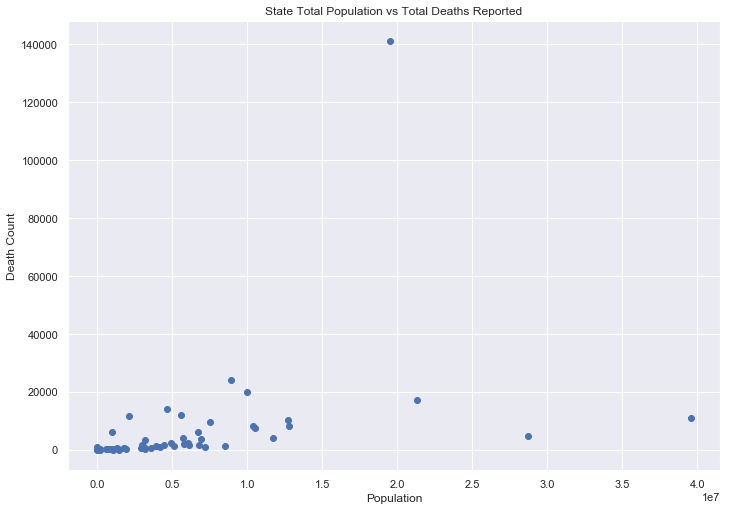

In [27]:
#population per state data scatter versus total deaths 
pop_state['Deaths']= death_per_state['Death_Count']
pop_state_vs_death = pop_state 

pop_state_vs_death

plt.scatter(pop_state_vs_death['PopulationEstimate2018'],pop_state_vs_death['Deaths'] )
plt.title('State Total Population vs Total Deaths Reported')
plt.xlabel('Population')
plt.ylabel('Death Count')



Text(0, 0.5, 'Death Count')

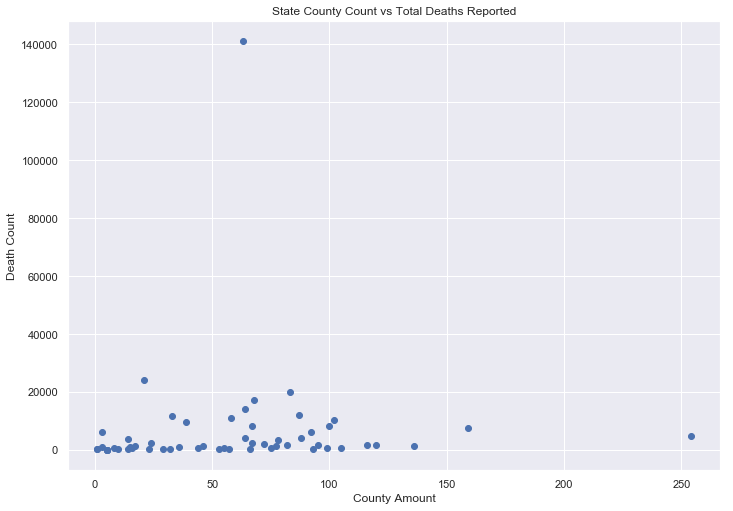

In [28]:
#county count versus total deaths scatter 

state_county_count['Deaths'] = death_per_state['Death_Count']
county_count_vs_death = state_county_count

county_count_vs_death

plt.scatter(county_count_vs_death['CountyName'],county_count_vs_death['Deaths'] )
plt.title('State County Count vs Total Deaths Reported')
plt.xlabel('County Amount')
plt.ylabel('Death Count')

Text(0.5, 0, '# of People Ages 60+ per County')

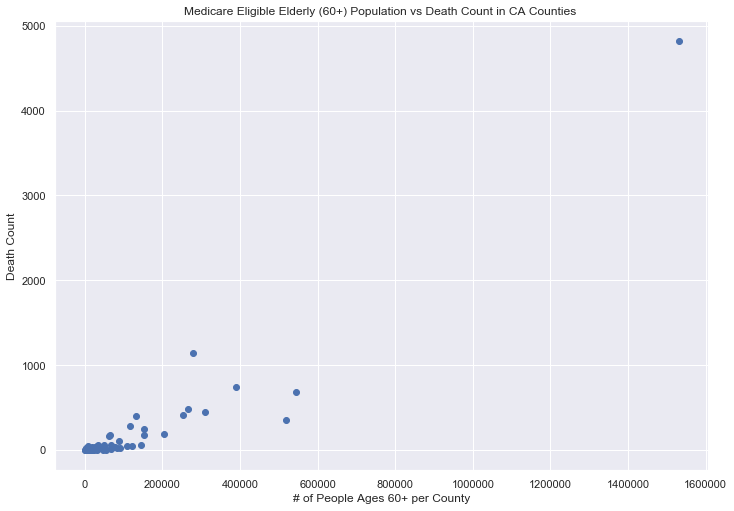

In [54]:
#within california and maybe do some other states 

#join on counties in california 

#maybe compare state with most elderly pop with state with less 

county_old = data[data['StateName'] == 'CA'][['CountyName','#EligibleforMedicare2018']]


death_per_county = pd.DataFrame(death_data[death_data['Province_State'] == 'California'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis = 1).sum(axis = 1))
death_per_county['County_Name'] = death_data[death_data['Province_State'] == 'California'][['Admin2']]
death_per_county = death_per_county.rename(columns = {0: 'Deaths'})
#death_per_county = death_per_county.iloc[:2] #2 counties misc not in other table for pop
county_old = county_old.reset_index(drop=True)
death_per_county = death_per_county.reset_index(drop = True)

death_vs_old = county_old.join(death_per_county, lsuffix='CountyName', rsuffix='County_Name').drop(columns=['County_Name'])
death_vs_old


plt.scatter(death_vs_old['#EligibleforMedicare2018'], death_vs_old['Deaths'])
plt.title('Medicare Eligible Elderly (60+) Population vs Death Count in CA Counties ')
plt.ylabel('Death Count')
plt.xlabel('# of People Ages 60+ per County')
#EDA scatter and closer look at features that could be affecting more or less death or diagnoses
#case rates among counties based on age 
#death rates among counties based on age 


In [62]:
death_vs_old
death_per_county

,Deaths,County_Name
0,414,Alameda
1,0,Alpine
2,0,Amador
3,0,Butte
4,0,Calaveras
5,0,Colusa
6,189,Contra Costa
7,0,Del Norte
8,0,El Dorado
9,62,Fresno


In [149]:
GA_county_HPSA = data[data['StateName'] == 'NC'][['CountyName','HPSAUnderservedPop']]
GA_county_HPSA = GA_county_HPSA.dropna()
GA_county_HPSA = GA_county_HPSA.reset_index(drop=True)
GA_county_HPSA

,CountyName,HPSAUnderservedPop
0,Alamance,10524.0
1,Alexander,5644.0
2,Alleghany,3873.0
3,Anson,15049.0
4,Ashe,4262.0
5,Avery,6374.0
6,Bertie,2309.0
7,Bladen,6561.0
8,Brunswick,13166.0
9,Buncombe,9328.0


In [150]:
GA_death_per_county = pd.DataFrame(death_data[death_data['Province_State'] == 'North Carolina'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis = 1).sum(axis = 1))
GA_death_per_county['County_Name'] = death_data[death_data['Province_State'] == 'North Carolina'][['Admin2']]
GA_death_per_county = GA_death_per_county.rename(columns = {0: 'Deaths'})
GA_death_per_county = GA_death_per_county.reset_index(drop=True)
GA_death_per_county


,Deaths,County_Name
0,0,Alamance
1,0,Alexander
2,0,Alleghany
3,0,Anson
4,0,Ashe
5,0,Avery
6,0,Beaufort
7,17,Bertie
8,0,Bladen
9,18,Brunswick


In [151]:
GA_HPSA_death = GA_death_per_county.join(GA_county_HPSA, lsuffix='County_Name', rsuffix='CountyName').drop(['CountyName'], axis = 1).dropna()
GA_HPSA_death

,Deaths,County_Name,HPSAUnderservedPop
0,0,Alamance,10524.0
1,0,Alexander,5644.0
2,0,Alleghany,3873.0
3,0,Anson,15049.0
4,0,Ashe,4262.0
5,0,Avery,6374.0
6,0,Beaufort,2309.0
7,17,Bertie,6561.0
8,0,Bladen,13166.0
9,18,Brunswick,9328.0


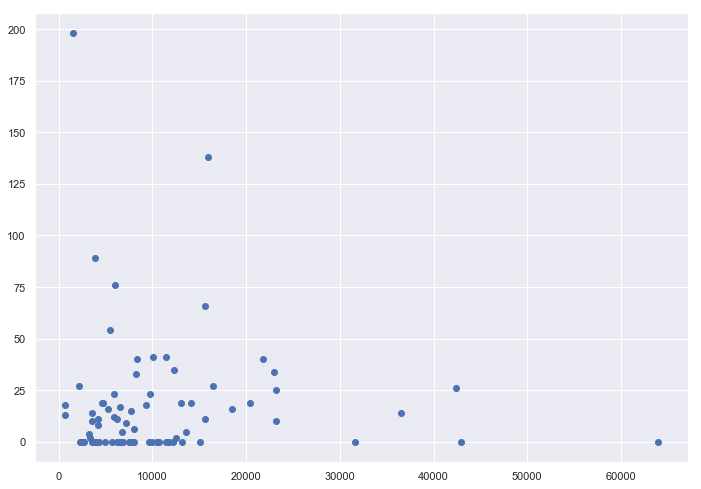

In [152]:
plt.scatter(GA_HPSA_death['HPSAUnderservedPop'], GA_HPSA_death['Deaths'])

#NC has some kind of trend but rest not really 

In [153]:
#419dataset? 
#check piazza for gregorion conversion shit 
#go back and do on other states 


In [157]:
hospital_county = data[data['StateName'] == 'CA'][['CountyName','#Hospitals']]
hospital_county = hospital_county.dropna()
hospital_county = hospital_county.reset_index(drop=True)
hospital_county

,CountyName,#Hospitals
0,Alameda,12.0
1,Alpine,0.0
2,Amador,1.0
3,Butte,4.0
4,Calaveras,1.0
5,Colusa,1.0
6,Contra Costa,7.0
7,Del Norte,1.0
8,El Dorado,2.0
9,Fresno,7.0


In [158]:
hospital_death_CA = hospital_county.join(death_per_county, lsuffix='CountyName', rsuffix='County_Name').drop(columns=['County_Name'])
hospital_death_CA

,CountyName,#Hospitals,Deaths
0,Alameda,12.0,414
1,Alpine,0.0,0
2,Amador,1.0,0
3,Butte,4.0,0
4,Calaveras,1.0,0
5,Colusa,1.0,0
6,Contra Costa,7.0,189
7,Del Norte,1.0,0
8,El Dorado,2.0,0
9,Fresno,7.0,62


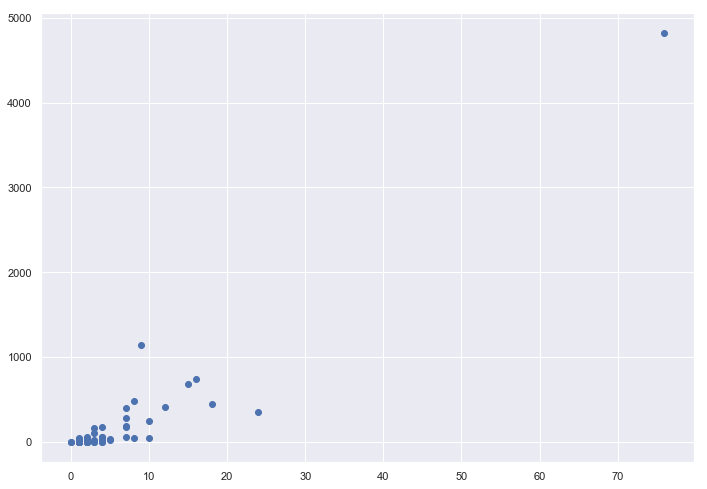

In [160]:
plt.scatter(hospital_death_CA['#Hospitals'], hospital_death_CA['Deaths'])
#first i thought that counties with more hospitals would have less deaths but rlly its just how hospitals are built with respect to population probably 

In [164]:
data.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [166]:
hospital_employees_per_state = data.groupby('StateName').sum()[['#FTEHospitalTotal2017']]
hospital_employees_per_state

,#FTEHospitalTotal2017
StateName,
AK,15003.0
AL,88369.0
AR,58025.0
AS,0.0
AZ,98442.0
CA,551825.0
CO,82584.0
CT,61485.0
DC,29315.0


In [168]:
medical_employee_vs_deaths = death_per_state.join(hospital_employees_per_state, lsuffix='StateName', rsuffix='StateName')
medical_employee_vs_deaths

,Death_Count,#FTEHospitalTotal2017
StateName,,
AK,140,15003.0
AL,2273,88369.0
AR,782,58025.0
AS,0,0.0
AZ,1059,98442.0
CA,11124,551825.0
CO,3926,82584.0
CT,749,61485.0
DC,277,29315.0


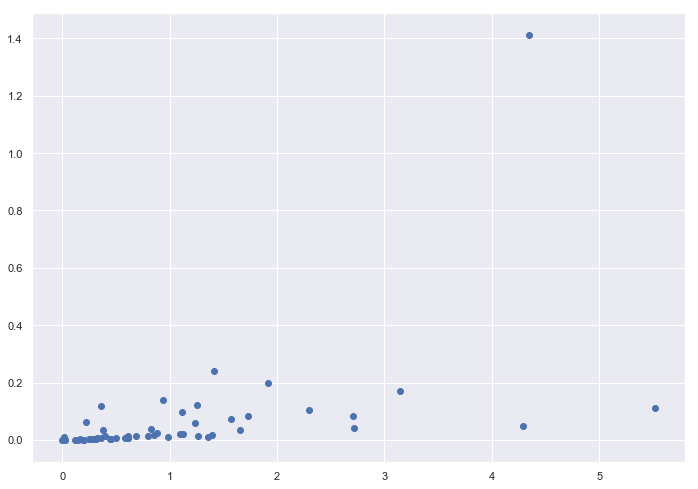

In [172]:
plt.scatter(medical_employee_vs_deaths['#FTEHospitalTotal2017']/100000,medical_employee_vs_deaths['Death_Count']/100000)
#shows the amount of hospital employees pers tate vs deaths 

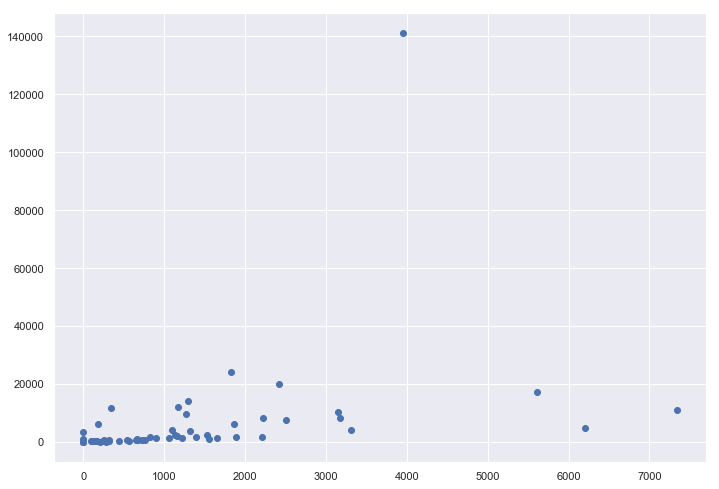

In [178]:
#ICU_beds
beds_per_state = data.groupby('StateName').sum()[['#ICU_beds']]
beds_vs_deaths = death_per_state.join(beds_per_state, lsuffix='StateName', rsuffix='StateName')
plt.scatter(beds_vs_deaths['#ICU_beds'], beds_vs_deaths['Death_Count'])

#beds vs. deaths 

In [180]:
smokers_county = data[data['StateName'] == 'CA'][['CountyName','Smokers_Percentage']]
smokers_county = smokers_county.reset_index(drop=True)
smokers_county

,CountyName,Smokers_Percentage
0,Alameda,9.732710
1,Alpine,14.455124
2,Amador,10.832190
3,Butte,13.768327
4,Calaveras,10.951936
5,Colusa,12.217256
6,Contra Costa,9.940587
7,Del Norte,15.132245
8,El Dorado,11.220361
9,Fresno,13.358908


In [187]:
cases_per_county = pd.DataFrame(case_data[case_data['Province_State'] == 'California'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis = 1).sum(axis = 1))
cases_per_county['County_Name'] = case_data[case_data['Province_State'] == 'California'][['Admin2']]
cases_per_county = cases_per_county.rename(columns = {0: 'Cases'})
cases_per_county = cases_per_county.reset_index(drop = True)
cases_per_county= cases_per_county.drop([58, 59])
cases_per_county

,Cases,County_Name
0,15259,Alameda
1,26,Alpine
2,105,Amador
3,274,Butte
4,169,Calaveras
5,48,Colusa
6,10301,Contra Costa
7,31,Del Norte
8,572,El Dorado
9,3381,Fresno


In [193]:
smoker_vs_case = smokers_county.join(cases_per_county, lsuffix='CountyName', rsuffix='County_Name')

In [194]:
smoker_vs_case = smoker_vs_case.drop(['CountyName'], axis = 1)
smoker_vs_case

,Smokers_Percentage,Cases,County_Name
0,9.732710,15259,Alameda
1,14.455124,26,Alpine
2,10.832190,105,Amador
3,13.768327,274,Butte
4,10.951936,169,Calaveras
5,12.217256,48,Colusa
6,9.940587,10301,Contra Costa
7,15.132245,31,Del Norte
8,11.220361,572,El Dorado
9,13.358908,3381,Fresno


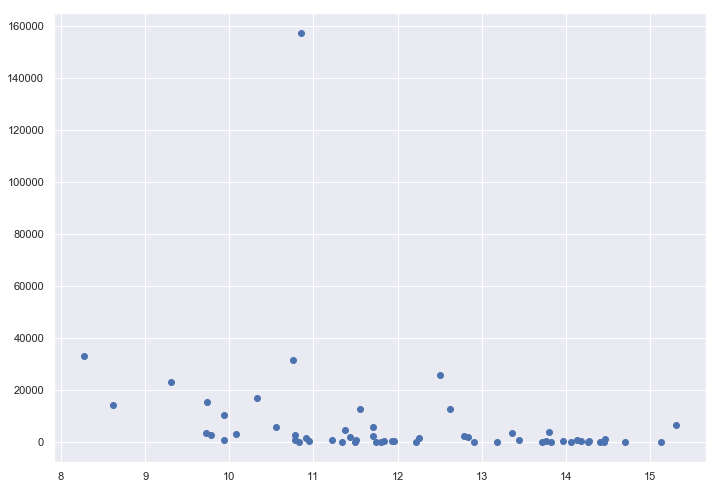

In [196]:
plt.scatter(smoker_vs_case['Smokers_Percentage'],smoker_vs_case['Cases'])

In [197]:
smoker_vs_death = smokers_county.join(death_per_county, lsuffix='CountyName', rsuffix='County_Name')

In [198]:
smoker_vs_death

,CountyName,Smokers_Percentage,Deaths,County_Name
0,Alameda,9.732710,414,Alameda
1,Alpine,14.455124,0,Alpine
2,Amador,10.832190,0,Amador
3,Butte,13.768327,0,Butte
4,Calaveras,10.951936,0,Calaveras
5,Colusa,12.217256,0,Colusa
6,Contra Costa,9.940587,189,Contra Costa
7,Del Norte,15.132245,0,Del Norte
8,El Dorado,11.220361,0,El Dorado
9,Fresno,13.358908,62,Fresno


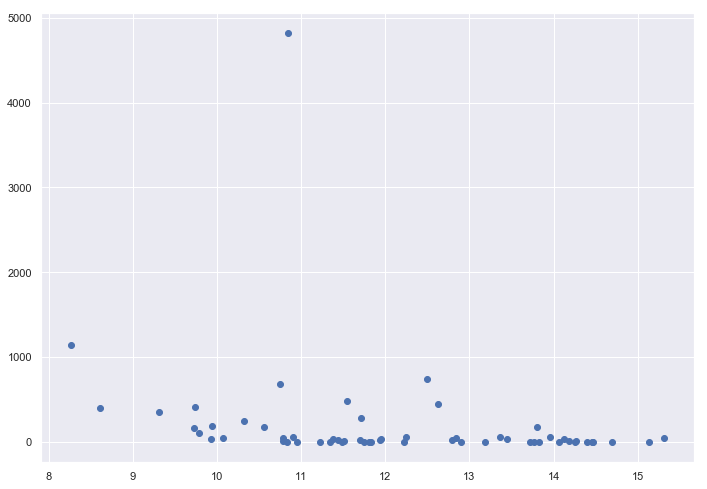

In [200]:
plt.scatter(smoker_vs_death['Smokers_Percentage'],smoker_vs_death['Deaths'])

In [212]:
RM_cty = data[data['StateName'] == 'CA'][['CountyName','RespMortalityRate2014']].reset_index(drop = True)

RM_deaths = RM_cty.join(death_per_county, lsuffix='CountyName', rsuffix='County_Name')
RM_cases = RM_cty.join(cases_per_county, lsuffix='CountyName', rsuffix='County_Name')
RM_deaths

#FTEHospitalTotal2017
#HPSAPercentPoverty
#419dataset? 
#check piazza for gregorion conversion shit 
#go back and do on other states 


,CountyName,RespMortalityRate2014,Deaths,County_Name
0,Alameda,36.12,414,Alameda
1,Alpine,42.85,0,Alpine
2,Amador,48.36,0,Amador
3,Butte,64.86,0,Butte
4,Calaveras,49.62,0,Calaveras
5,Colusa,55.28,0,Colusa
6,Contra Costa,40.34,189,Contra Costa
7,Del Norte,75.02,0,Del Norte
8,El Dorado,46.03,0,El Dorado
9,Fresno,46.22,62,Fresno


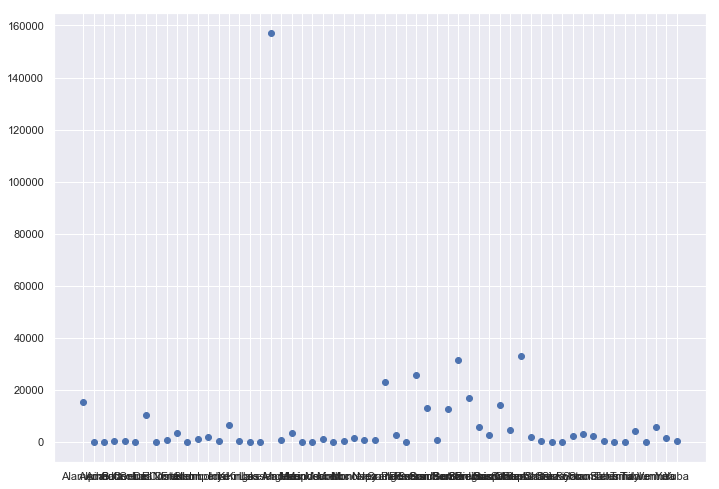

In [214]:
plt.scatter(RM_cases['CountyName'], RM_cases['Cases'])



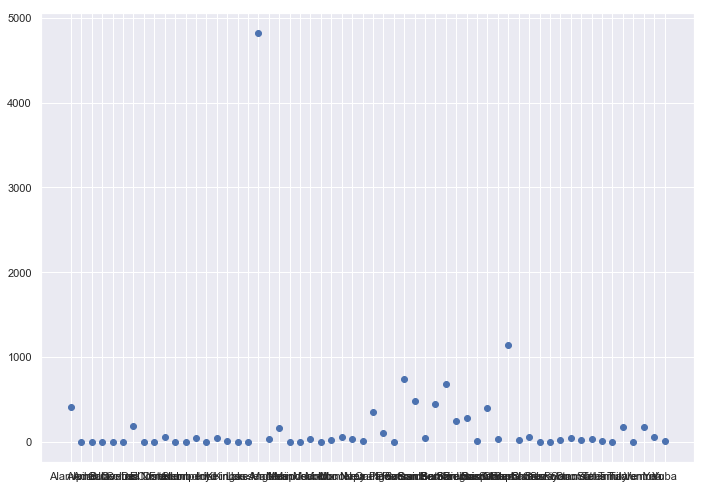

In [216]:

plt.scatter(RM_deaths['CountyName'], RM_deaths['Deaths'])


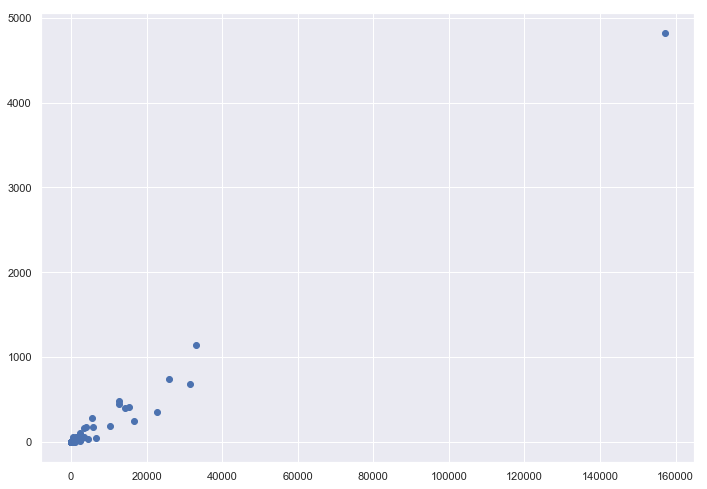

In [226]:
cases_per_county.shape
death_per_county.shape
plt.scatter(cases_per_county['Cases'], death_per_county['Deaths'])

#419dataset? 
#check piazza for gregorion conversion shit 
#go back and do on other states 

In [7]:
april_data = pd.read_csv('4.18states.csv')
april_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
5,California,US,2020-04-18 22:32:47,36.1162,-119.6816,30491,1140,NaN,29351.0,6.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079
6,Colorado,US,2020-04-18 22:32:47,39.0598,-105.3111,9047,389,NaN,8658.0,8.0,159.648818,43307.0,1755.0,4.299768,84000008,USA,764.221442,19.398696
7,Connecticut,US,2020-04-18 22:32:47,41.5978,-72.7554,17550,1086,NaN,16464.0,9.0,492.246487,55462.0,1946.0,6.188034,84000009,USA,1555.611091,11.088319
8,Delaware,US,2020-04-18 22:32:47,39.3185,-75.5071,2538,67,423.0,2471.0,10.0,260.638101,14017.0,224.0,2.639874,84000010,USA,1439.465825,8.825847
9,Diamond Princess,US,2020-04-18 22:32:47,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


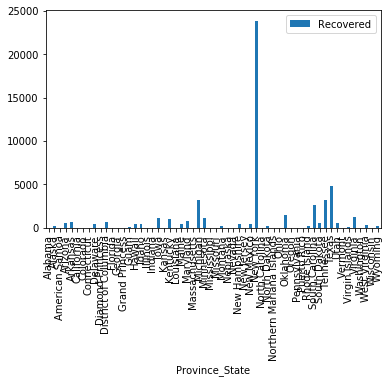

In [8]:
US_data = april_data[april_data['Country_Region']== 'US'][:-1]
#Deaths, confirmed, recovered per State bar

US_data.plot(x='Province_State', y=['Recovered'], kind="bar")


In [241]:
US_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
5,California,US,2020-04-18 22:32:47,36.1162,-119.6816,30491,1140,NaN,29351.0,6.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079
6,Colorado,US,2020-04-18 22:32:47,39.0598,-105.3111,9047,389,NaN,8658.0,8.0,159.648818,43307.0,1755.0,4.299768,84000008,USA,764.221442,19.398696
7,Connecticut,US,2020-04-18 22:32:47,41.5978,-72.7554,17550,1086,NaN,16464.0,9.0,492.246487,55462.0,1946.0,6.188034,84000009,USA,1555.611091,11.088319
8,Delaware,US,2020-04-18 22:32:47,39.3185,-75.5071,2538,67,423.0,2471.0,10.0,260.638101,14017.0,224.0,2.639874,84000010,USA,1439.465825,8.825847
9,Diamond Princess,US,2020-04-18 22:32:47,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


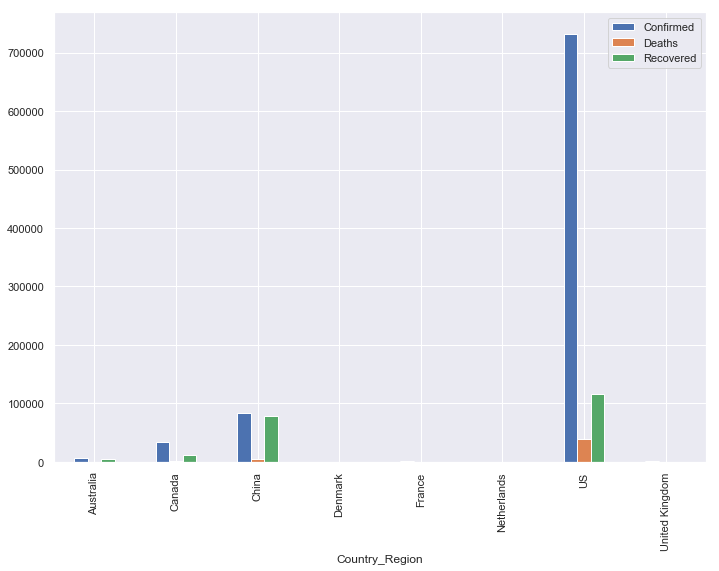

In [244]:
#Deaths, confirmed, recovered per country bar 
countries_data = april_data.groupby('Country_Region').sum().reset_index()
countries_data.plot(x='Country_Region', y=['Confirmed', 'Deaths', 'Recovered'], kind="bar")

In [245]:
countries_data
# pretty much useless

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,Australia,-256.850200,1130.843900,6547,67,4124.0,2356.0,0.0,190.184442,0.0,0.0,11.556079,28836,0.000000,0.000000
1,Canada,638.555800,-1119.490300,34356,1400,10964.0,21992.0,0.0,594.818181,0.0,0.0,21.359473,173707,0.000000,0.000000
2,China,1083.336700,3684.419700,83787,4636,77614.0,1537.0,0.0,168.124010,0.0,0.0,36.749815,484886,0.000000,0.000000
3,Denmark,133.599500,-49.516100,195,0,184.0,11.0,0.0,395.923380,0.0,0.0,0.000000,538,0.000000,0.000000
4,France,45.235895,-240.860614,1180,22,604.0,554.0,0.0,449.343812,0.0,0.0,17.448905,4632,0.000000,0.000000
5,Netherlands,54.911600,-270.251600,177,12,67.0,98.0,0.0,259.135630,0.0,0.0,23.288690,2133,0.000000,0.000000
6,US,2063.045000,-4771.570400,732197,38664,116230.0,628693.0,190709.0,9944.220882,3690482.0,114029.0,212.454780,4536262757,69236.899673,692.912346
7,United Kingdom,214.651798,-479.488666,1097,34,414.0,649.0,0.0,1848.551458,0.0,0.0,23.113395,11868,0.000000,0.000000


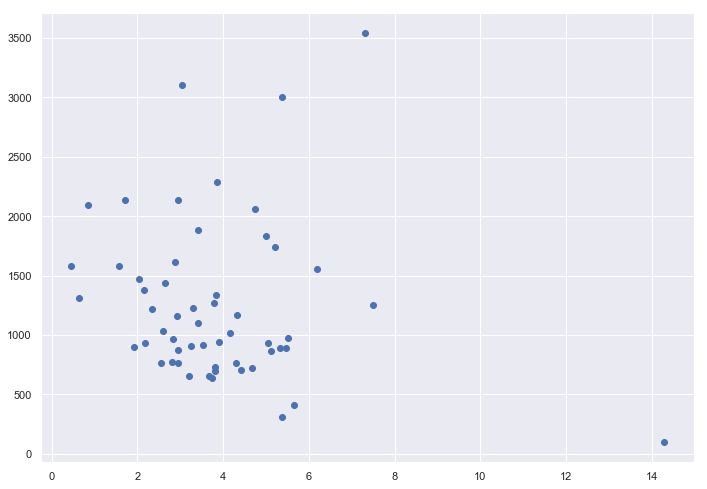

In [252]:
#testing rate vs deaths per state 
#people tested vs mortality rate 
plt.scatter(US_data['Mortality_Rate'], US_data['Testing_Rate'])

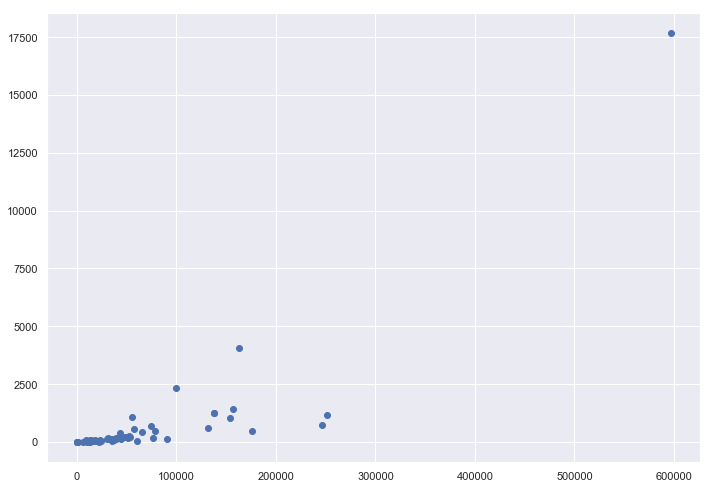

In [255]:
plt.scatter(US_data['People_Tested'], US_data['Deaths'])

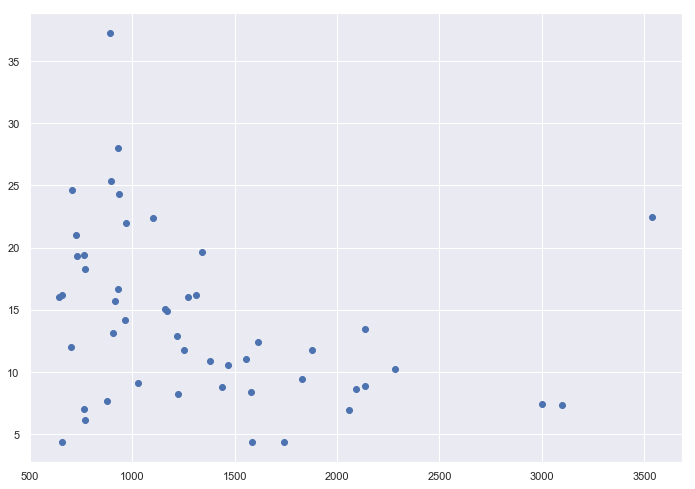

In [256]:
plt.scatter(US_data['Testing_Rate'], US_data['Hospitalization_Rate'])

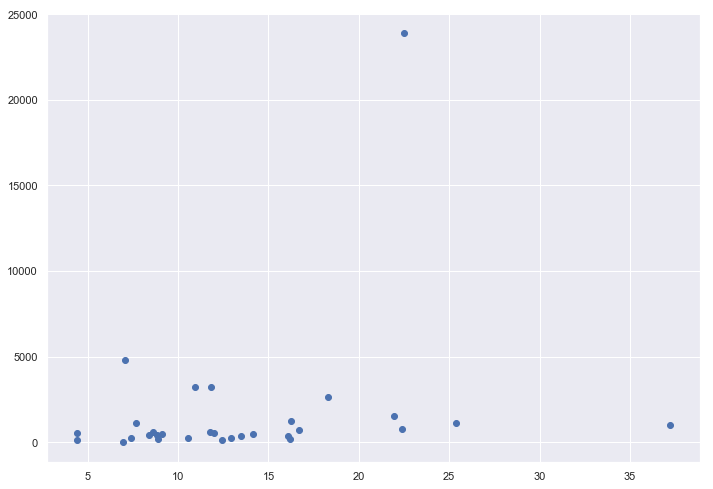

In [261]:
plt.scatter(US_data['Hospitalization_Rate'], US_data['Recovered'])

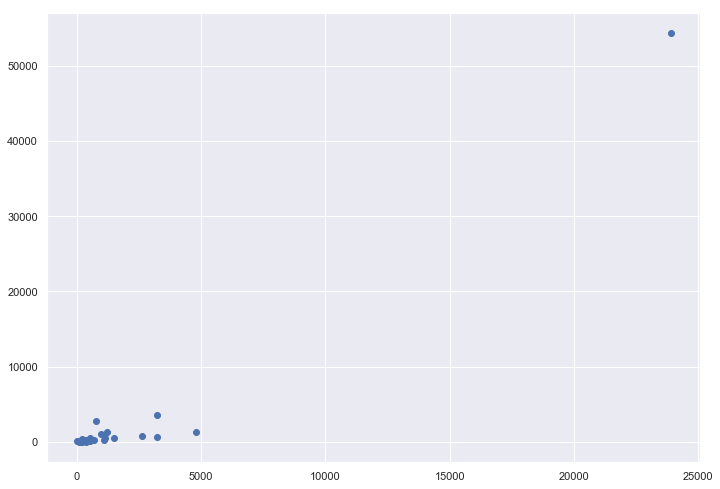

In [258]:
plt.scatter(US_data['Recovered'], US_data['People_Hospitalized'])

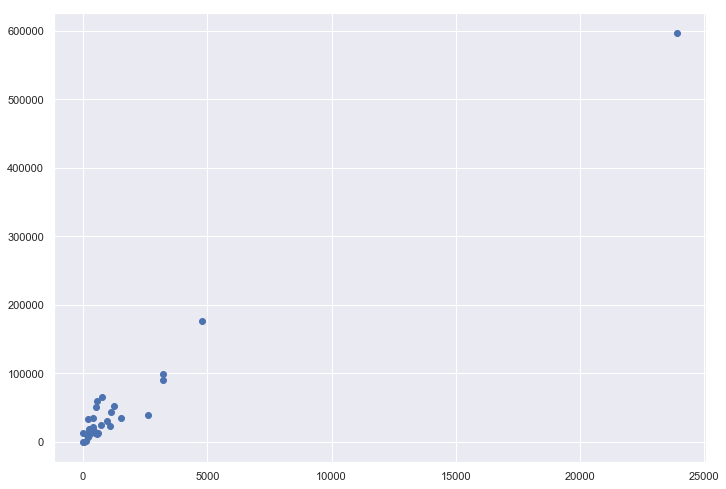

In [259]:
plt.scatter(US_data['Recovered'], US_data['People_Tested'])

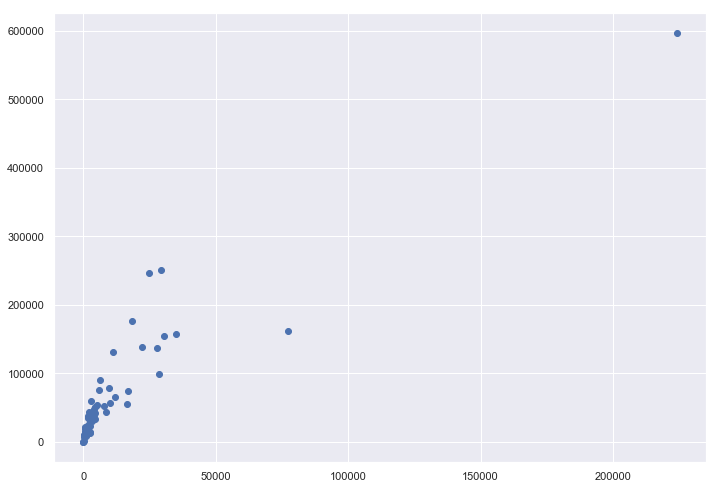

In [260]:
plt.scatter(US_data['Active'], US_data['People_Tested'])

In [284]:
pop_dens = data[['StateName', 'CountyName', 'PopulationDensityperSqMile2010']]
county_deaths = death_joined.drop(['countyFIPS',
 'STATEFP',
 'COUNTYFP',
 'StateName',
 'State',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'CensusRegionName',
 'CensusDivisionName',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',
 'PopMale30-342010',
 'PopFmle30-342010',
 'PopMale35-442010',
 'PopFmle35-442010',
 'PopMale45-542010',
 'PopFmle45-542010',
 'PopMale55-592010',
 'PopFmle55-592010',
 'PopMale60-642010',
 'PopFmle60-642010',
 'PopMale65-742010',
 'PopFmle65-742010',
 'PopMale75-842010',
 'PopFmle75-842010',
 'PopMale>842010',
 'PopFmle>842010',
 '3-YrMortalityAge<1Year2015-17',
 '3-YrMortalityAge1-4Years2015-17',
 '3-YrMortalityAge5-14Years2015-17',
 '3-YrMortalityAge15-24Years2015-17',
 '3-YrMortalityAge25-34Years2015-17',
 '3-YrMortalityAge35-44Years2015-17',
 '3-YrMortalityAge45-54Years2015-17',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17',
 'mortality2015-17Estimated',
 'stay at home',
 '>50 gatherings',
 '>500 gatherings',
 'public schools',
 'restaurant dine-in',
 'entertainment/gym',
 'federal guidelines',
 'foreign travel ban',
 'SVIPercentile',
 'HPSAShortage',
 'HPSAServedPop',
 'HPSAUnderservedPop',
 'UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',                                 
 'Population'], axis = 1)
pop_dens['Deaths'] = county_deaths.sum(axis = 1)
pop_dens

/Users/anikarawat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,StateName,CountyName,PopulationDensityperSqMile2010,Deaths
0,AL,Autauga,91.8,0
1,AL,Baldwin,114.7,89
2,AL,Barbour,31.0,30
3,AL,Bibb,36.8,650
4,AL,Blount,88.9,17
5,AL,Bullock,17.5,14
6,AL,Butler,27.0,26
7,AL,Calhoun,195.7,0
8,AL,Chambers,57.4,0
9,AL,Cherokee,46.9,0


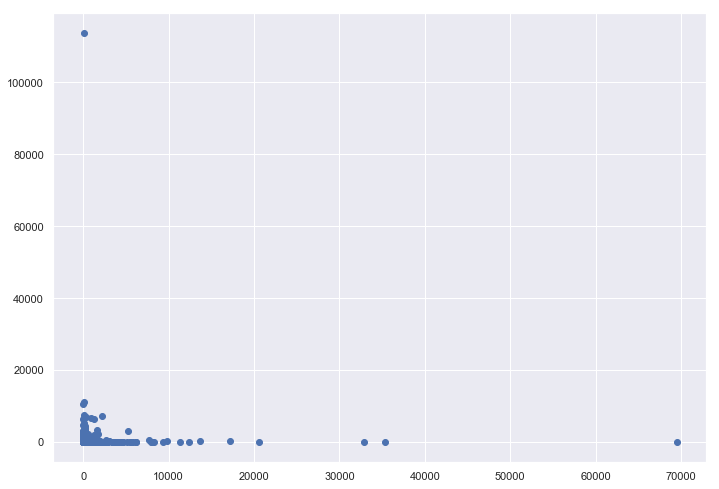

In [281]:
plt.scatter(pop_dens['PopulationDensityperSqMile2010'], pop_dens['Deaths'])

In [282]:
data.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P